# Analiza Svetovne lestvice FIFA

In [180]:
# Najprej naložim vse pakete
import pandas as pd
import numpy as np


reprezentance = pd.read_csv('reprezentance.csv', index_col='Ranking države')

# največ 20 vrstic se vedno izpiše
pd.options.display.max_rows = 20

# omogoči celotno širino stolpca
pd.set_option('display.max_colwidth', None)  

import numpy as np
import matplotlib.pyplot as plt

In [181]:
reprezentance

,Narod,Število članov,Povprečna starost,Skupna vrednost,Točke
Ranking države,,,,,
1,Argentina,24,27.8,€730.00m,1889
2,France,23,26.0,€1.06bn,1852
3,Spain,23,26.7,€750.00m,1836
4,England,24,26.0,€1.46bn,1817
5,Brazil,23,26.5,€770.50m,1772
...,...,...,...,...,...
206,Turks-Caicos,16,21.2,€100k,803
207,US Virgin,21,24.3,-,792
208,B. Virgin,20,21.7,-,791


# 1. Primerjava najboljše in najsalbše reprezentance s Slovenijo

Najprej bi rad naredil analizo najboljše in najslabše reprezentance na lestvici in ju primerjal s Slovenijo

In [182]:
najboljsa = reprezentance.iloc[0]  # Uporabimo iloc[0], da izberemo prvo vrstico

# Izpis podatkov za prvo reprezentanco
print("Podatki za trenutno vodilno reprezentanco:")
print(f"- Narod: {najboljsa['Narod']}")
print(f"- Število članov: {najboljsa['Število članov']}")
print(f"- Povprečna starost: {najboljsa['Povprečna starost']}")
print(f"- Skupna vrednost: {najboljsa['Skupna vrednost']}")
print(f"- Točke: {najboljsa['Točke']}")

Podatki za trenutno vodilno reprezentanco:
- Narod: Argentina
- Število članov: 24
- Povprečna starost: 27.8
- Skupna vrednost: €730.00m
- Točke: 1889


In [183]:
najslabsa = reprezentance.iloc[-1] # Uporabimo iloc[-1], da izberemo prvo vrstico


# Izpis podatkov za najslabšo reprezentanco
print("Podatki za najslabšo reprezentanco:")
print(f"- Narod: {najslabsa['Narod']}")
print(f"- Število članov: {najslabsa['Število članov']}")
print(f"- Povprečna starost: {najslabsa['Povprečna starost']}")
print(f"- Skupna vrednost: {najslabsa['Skupna vrednost']}")
print(f"- Točke: {najslabsa['Točke']}")

Podatki za najslabšo reprezentanco:
- Narod: San Marino
- Število članov: 27
- Povprečna starost: 24.5
- Skupna vrednost: €1.08m
- Točke: 746


In [184]:
slovenija = reprezentance[reprezentance['Narod'] == 'Slovenia']

podatki_slovenije = slovenija.iloc[0]

ranking_slovenija = slovenija.index[0]  # Dobimo ranking iz indeksa

print("Podatki za reprezentanco Slovenije:")
print(f"- Ranking države: {ranking_slovenija}")
print(f"- Narod: {slovenija.iloc[0]['Narod']}")
print(f"- Število članov: {slovenija.iloc[0]['Število članov']}")
print(f"- Povprečna starost: {slovenija.iloc[0]['Povprečna starost']}")
print(f"- Skupna vrednost: {slovenija.iloc[0]['Skupna vrednost']}")
print(f"- Točke: {slovenija.iloc[0]['Točke']}")

Podatki za reprezentanco Slovenije:
- Ranking države: 51
- Narod: Slovenia
- Število članov: 23
- Povprečna starost: 27.8
- Skupna vrednost: €126.75m
- Točke: 1463


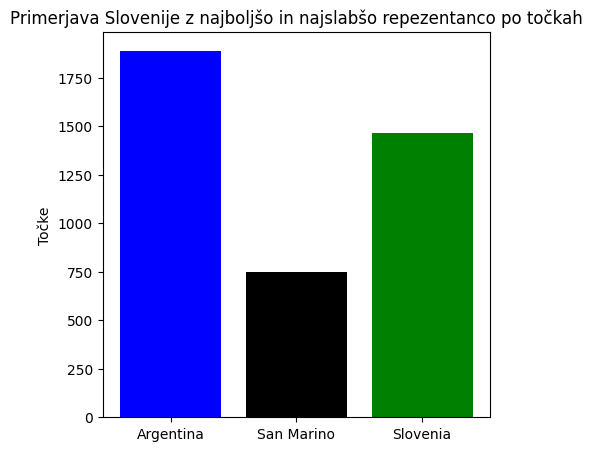

In [185]:
# Ustvari seznam imen reprezentanc in njihovih točk
drzave = [najboljsa['Narod'], najslabsa['Narod'], podatki_slovenije['Narod']]
tocke = [najboljsa['Točke'], najslabsa['Točke'], podatki_slovenije['Točke']]

# Nariše graf
plt.figure(figsize=(5, 5))
plt.bar(drzave, tocke, color=['blue', 'black', 'green'])

# Nastavitve grafa
plt.ylabel('Točke')
plt.title('Primerjava Slovenije z najboljšo in najslabšo repezentanco po točkah')
plt.show()


In [186]:

# Pridobi skupne vrednosti igralcev za Slovenijo ter najboljšo in najslabšo ekipo
vrednost_igralcev_slovenije = slovenija['Skupna vrednost'].values[0]
vrednost_igralcev_najboljse = najboljsa['Skupna vrednost']
vrednost_igralcev_najslabse = najslabsa['Skupna vrednost']

print(f"Vrednost igralcev najboljše ekipe ({najboljsa['Narod']}): {vrednost_igralcev_najboljse}")
print(f"Vrednost igralcev najslabše ekipe ({najslabsa['Narod']}): {vrednost_igralcev_najslabse}")
print(f"Vrednost igralcev Slovenije: {vrednost_igralcev_slovenije}")


Vrednost igralcev najboljše ekipe (Argentina): €730.00m
Vrednost igralcev najslabše ekipe (San Marino): €1.08m
Vrednost igralcev Slovenije: €126.75m


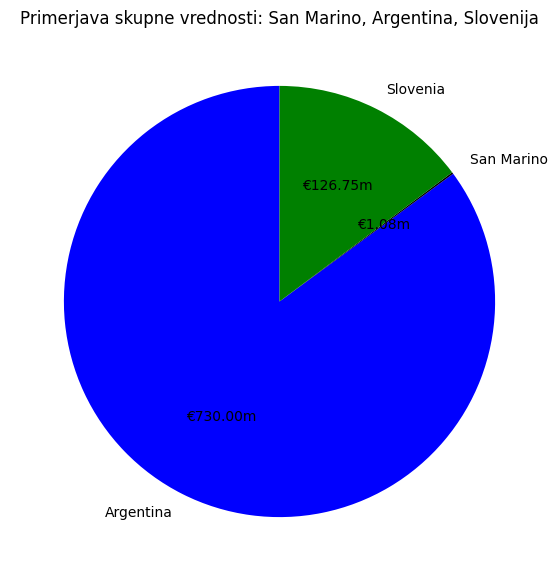

In [187]:

vrednosti = [najboljsa['Skupna vrednost'], najslabsa['Skupna vrednost'], podatki_slovenije['Skupna vrednost']]

# Pretvorimo vrednosti iz stringa v numerične vrednosti, kot smo prej naredili
def pretvori_vrednost(value):
    value = value.replace('€', '').replace('m', 'e6').replace('bn', 'e9')
    return eval(value)

vrednosti_numeric = [pretvori_vrednost(vrednost) for vrednost in vrednosti]

def autopct_original(values_original):
    def my_format(pct):
        # Najdemo indeks ustrezne vrednosti glede na odstotek
        total = sum(vrednosti_numeric)
        for i, val in enumerate(vrednosti_numeric):
            if abs(pct * total / 100.0 - val) < total * 0.01:
                return values_original[i]  # Vrni originalno vrednost
        return ''
    return my_format

# Ustvari tortni diagram
plt.figure(figsize=(7, 7))
plt.pie(vrednosti_numeric, labels=drzave, autopct=autopct_original(vrednosti), startangle=90, colors=['blue', 'black', 'green'])
plt.title('Primerjava skupne vrednosti: San Marino, Argentina, Slovenija')
plt.show()


In [188]:
stevilo_clanov_najboljsa = najboljsa['Število članov']
stevilo_clanov_najslabsa = najslabsa['Število članov']
stevilo_clanov_slovenija = podatki_slovenije['Število članov']


vrednost_na_igralca_najboljsa = vrednosti_numeric[0] / stevilo_clanov_najboljsa
vrednost_na_igralca_najslabsa = vrednosti_numeric[1] / stevilo_clanov_najslabsa
vrednost_na_igralca_slovenija = vrednosti_numeric[2] / stevilo_clanov_slovenija

print(f"Vrednost na igralca za najboljšo ekipo ({najboljsa['Narod']}): €{vrednost_na_igralca_najboljsa:,.0f}")
print(f"Vrednost na igralca za najslabšo ekipo ({najslabsa['Narod']}): €{vrednost_na_igralca_najslabsa:,.0f}")
print(f"Vrednost na igralca za Slovenijo: €{vrednost_na_igralca_slovenija:,.0f}")


Vrednost na igralca za najboljšo ekipo (Argentina): €30,416,667
Vrednost na igralca za najslabšo ekipo (San Marino): €40,000
Vrednost na igralca za Slovenijo: €5,510,870
